In [1]:
pip install  mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [16]:
import mysql.connector
import pandas as pd
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with
# actual credentials
connection = mysql.connector.connect(
user='root',
password='Arshiya@12',
host='localhost',
database='mini_project'
)


In [12]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'Employees ' table
cursor.execute('SELECT * FROM Employees ')
#After fetching data from the database we are storing it into Pandas DataFrame
employees_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])


In [13]:
# Query data from the 'Departments ' table
cursor.execute('SELECT * FROM Departments ')
departments_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [14]:
# Query data from the 'Jobs ' table
cursor.execute('SELECT * FROM Jobs ')
jobs_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])


In [20]:
#printing first 5 records from each table
print(employees_data.head())
print(departments_data.head())
print(jobs_data.head())


   employee_id first_name last_name                        email  \
0            1       John       Doe         john.doe@example.com   
1            2       Jane     Smith       jane.smith@example.com   
2            3    Michael   Johnson  michael.johnson@example.com   
3            4      Emily     Davis      emily.davis@example.com   
4            5      James     Brown      james.brown@example.com   

   phone_number   hire_date  job_id    salary  manager_id  department_id  
0  123-456-7890  2022-01-01       1  50000.00         NaN              1  
1  987-654-3210  2022-02-15       2  60000.00         1.0              1  
2  555-123-4567  2022-03-20       3  55000.00         1.0              2  
3  333-444-5555  2022-04-22       4  70000.00         2.0              3  
4  222-333-4444  2022-05-10       1  48000.00         3.0              1  
   department_id  department_name  location_id
0              1            Sales            1
1              2        Marketing            2


In [21]:
(employees_data.head())

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id
0,1,John,Doe,john.doe@example.com,123-456-7890,2022-01-01,1,50000.00,NaN,1
1,2,Jane,Smith,jane.smith@example.com,987-654-3210,2022-02-15,2,60000.00,1.0,1
2,3,Michael,Johnson,michael.johnson@example.com,555-123-4567,2022-03-20,3,55000.00,1.0,2
3,4,Emily,Davis,emily.davis@example.com,333-444-5555,2022-04-22,4,70000.00,2.0,3
4,5,James,Brown,james.brown@example.com,222-333-4444,2022-05-10,1,48000.00,3.0,1


In [22]:
(departments_data.head())


,department_id,department_name,location_id
0,1,Sales,1
1,2,Marketing,2
2,3,Finance,3
3,4,Human Resources,1
4,5,Engineering,2


In [24]:
(jobs_data.head())


,job_id,job_title,min_salary,max_salary
0,1,Sales Representative,30000.00,60000.00
1,2,Marketing Specialist,35000.00,65000.00
2,3,Financial Analyst,40000.00,70000.00
3,4,Human Resources Manager,45000.00,75000.00
4,5,Software Engineer,50000.00,80000.00


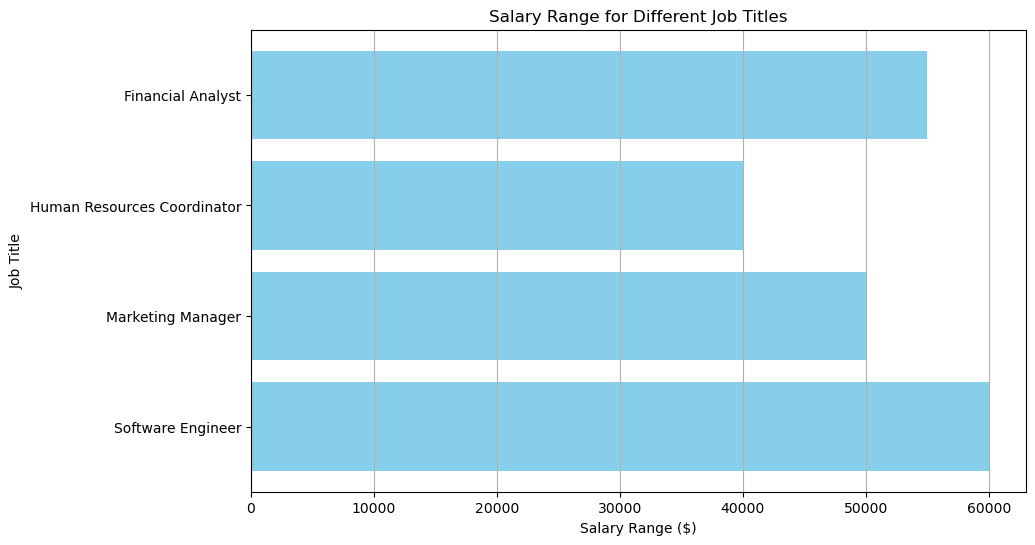

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'job_title': ['Software Engineer', 'Marketing Manager', 'Human Resources Coordinator', 'Financial Analyst'],
    'min_salary': [60000.00, 50000.00, 40000.00, 55000.00],
    'max_salary': [120000.00, 100000.00, 80000.00, 110000.00]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the salary range for each job title
df['salary_range'] = df['max_salary'] - df['min_salary']

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df['job_title'], df['salary_range'], color='skyblue')
plt.xlabel('Salary Range ($)')
plt.ylabel('Job Title')
plt.title('Salary Range for Different Job Titles')
plt.grid(axis='x')
plt.show()


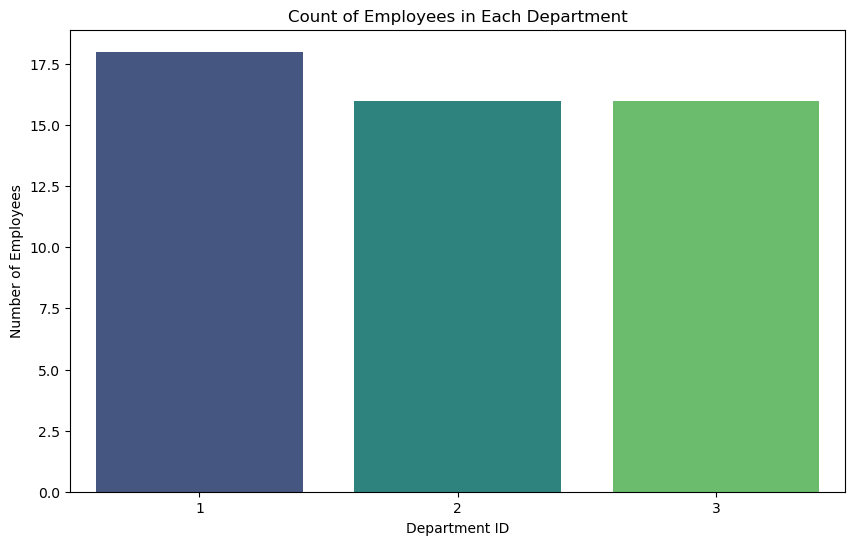

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded data into pandas DataFrames: employees_df, departments_df

# Count of employees in each department
department_counts = employees_data['department_id'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=department_counts.index, y=department_counts.values, palette="viridis")
plt.title('Count of Employees in Each Department')
plt.xlabel('Department ID')
plt.ylabel('Number of Employees')
plt.show()

C:\Users\Lenovo\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


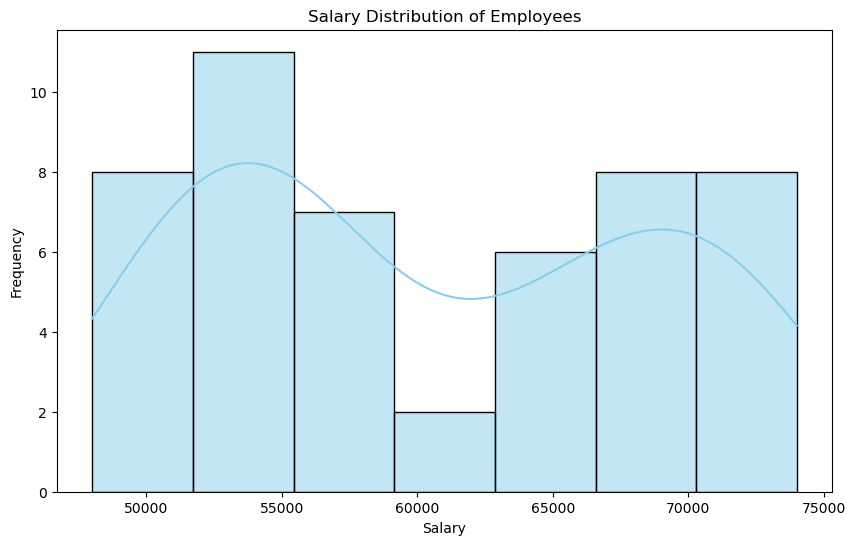

In [33]:
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(employees_data['salary'], kde=True, color='skyblue')
plt.title('Salary Distribution of Employees')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

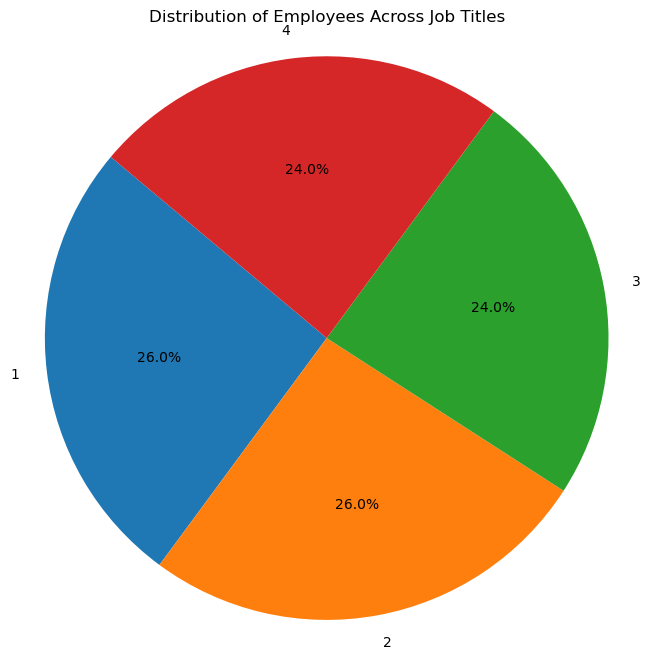

In [35]:
# Count of employees in each job title
job_counts = employees_data['job_id'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(job_counts.values, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees Across Job Titles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()